In [1]:
print "Let's do this!"


Let's do this!


In [2]:
#Import Beautiful Soup and urllib2
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
#Practice Open URL
practice_url = "http://pokemondb.net/pokedex/all"

In [4]:
page = urllib2.urlopen(practice_url).read()
soup = BeautifulSoup(page)

In [5]:
#Check to see what soup looks like
soup.prettify()[:1000]

u'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Pok\xe9mon Pok\xe9dex: list of Pok\xe9mon with stats | Pok\xe9mon Database\n  </title>\n  <link href="http://fonts.googleapis.com/css?family=Lato:400,700,400italic|Open+Sans+Condensed:700" rel="stylesheet"/>\n  <link href="/static/css/min/pokemondb.24.css" rel="stylesheet"/>\n  <link href="/static/css/min/pkmn-icons.3.css" rel="stylesheet"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="The Pok\xe9dex contains detailed stats for every creature from the Pok\xe9mon games, up to and including the latest Generation 6 releases (X, Y, Omega Ruby, Alpha Sapphire)." name="description"/>\n  <link href="http://pokemondb.net/pokedex/all" rel="canonical"/>\n  <link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="/apple-touch-icon-precomposed.png" rel="apple-touch-icon-precomposed"/>\n  <link href="http://pokemondb.net/news/feed" rel="alter


####find method
The find method will search for and return the first tag matching your corresponding search criteria, if it exists. You can specify tag and attribute info etc.
####findAll
There is also a findAll method that will return a collection of tags matching your query.

####Documentation
find_all(name, attrs, recursive, string, limit, **kwargs)

http://www.crummy.com/software/BeautifulSoup/bs4/doc/#find

Example:
mydivs = soup.findAll("div", { "class" : "stylelistrow" })

In [6]:
# Find the Columns of data
poke_cols_block = soup.find('thead')
print "Type: ", type(poke_cols_block)
print "-------<><><><><><><>"
print poke_cols_block

Type:  <class 'bs4.element.Tag'>
-------<><><><><><><>
<thead>
<tr>
<th class="sorting" data-sort="int"><div class="sortwrap">#</div></th> <th class="sorting" data-sort="string"><div class="sortwrap">Name</div></th> <th><div class="sortwrap">Type</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Total</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">HP</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Attack</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Defense</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Atk</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Def</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Speed</div></th> </tr>
</thead>


In [7]:
# Find all the table headers
poke_cols = poke_cols_block.find_all('th')
print "Type: ", type(poke_cols)
print "-------<><><><><><><>"
print poke_cols

Type:  <class 'bs4.element.ResultSet'>
-------<><><><><><><>
[<th class="sorting" data-sort="int"><div class="sortwrap">#</div></th>, <th class="sorting" data-sort="string"><div class="sortwrap">Name</div></th>, <th><div class="sortwrap">Type</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">Total</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">HP</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">Attack</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">Defense</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Atk</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Def</div></th>, <th class="sorting" data-sort="int"><div class="sortwrap">Speed</div></th>]


In [8]:
cols = []
for header in poke_cols:
    val = header.string
    if val == "#":
        val = "ID"
    cols.append(val)
#Add another Type column (because you have to fish it out of the name a little funky later)
cols.append('Pokemon_Type')
print "Columns are: ", "\n", cols

Columns are:  
['ID', u'Name', u'Type', u'Total', u'HP', u'Attack', u'Defense', u'Sp. Atk', u'Sp. Def', u'Speed', 'Pokemon_Type']


In [9]:
# Find the table of data
poke_table = soup.find('tbody')
print "Type: ", type(poke_table)
print "<><><><><><><>"
print poke_table

Type:  <class 'bs4.element.Tag'>
<><><><><><><>
<tbody>
<tr>
<td class="num cell-icon-string" data-sort-value="1"><i class="pki" data-sprite="pkiAll n1"></i> 001</td> <td class="cell-icon-string"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison">Poison</a></td>
<td class="num-total">318</td>
<td class="num">45</td>
<td class="num">49</td>
<td class="num">49</td>
<td class="num">65</td>
<td class="num">65</td>
<td class="num">45</td>
</tr>
<tr>
<td class="num cell-icon-string" data-sort-value="2"><i class="pki" data-sprite="pkiAll n2"></i> 002</td> <td class="cell-icon-string"><a class="ent-name" href="/pokedex/ivysaur" title="View pokedex for #002 Ivysaur">Ivysaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href=

In [10]:
rows = poke_table.findAll('tr')
print "Type: ", type(rows), '\n'
print rows

Type:  <class 'bs4.element.ResultSet'> 

[<tr>
<td class="num cell-icon-string" data-sort-value="1"><i class="pki" data-sprite="pkiAll n1"></i> 001</td> <td class="cell-icon-string"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison">Poison</a></td>
<td class="num-total">318</td>
<td class="num">45</td>
<td class="num">49</td>
<td class="num">49</td>
<td class="num">65</td>
<td class="num">65</td>
<td class="num">45</td>
</tr>, <tr>
<td class="num cell-icon-string" data-sort-value="2"><i class="pki" data-sprite="pkiAll n2"></i> 002</td> <td class="cell-icon-string"><a class="ent-name" href="/pokedex/ivysaur" title="View pokedex for #002 Ivysaur">Ivysaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison

In [11]:
#How many rows do we have?
print "Number of rows: ", len(rows)

Number of rows:  800


In [12]:
one_row = rows[0]
print one_row
one_row_data = one_row.findAll('td')
print '\n',one_row_data

<tr>
<td class="num cell-icon-string" data-sort-value="1"><i class="pki" data-sprite="pkiAll n1"></i> 001</td> <td class="cell-icon-string"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison">Poison</a></td>
<td class="num-total">318</td>
<td class="num">45</td>
<td class="num">49</td>
<td class="num">49</td>
<td class="num">65</td>
<td class="num">65</td>
<td class="num">45</td>
</tr>

[<td class="num cell-icon-string" data-sort-value="1"><i class="pki" data-sprite="pkiAll n1"></i> 001</td>, <td class="cell-icon-string"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td>, <td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison">Poison</a></td>, <td class="num-tot

In [13]:
#How to find the ID
one_row = rows[0]
#print one_row
#print type(one_row)
#print one_row.string
one_row_data = one_row.findAll('td')
print "type: ", type(one_row_data)
print one_row_data

id_data = one_row_data[0]
print type(id_data)
print id_data
print id_data.contents
print id_data.contents[1]

type:  <class 'bs4.element.ResultSet'>
[<td class="num cell-icon-string" data-sort-value="1"><i class="pki" data-sprite="pkiAll n1"></i> 001</td>, <td class="cell-icon-string"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td>, <td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison">Poison</a></td>, <td class="num-total">318</td>, <td class="num">45</td>, <td class="num">49</td>, <td class="num">49</td>, <td class="num">65</td>, <td class="num">65</td>, <td class="num">45</td>]
<class 'bs4.element.Tag'>
<td class="num cell-icon-string" data-sort-value="1"><i class="pki" data-sprite="pkiAll n1"></i> 001</td>
[<i class="pki" data-sprite="pkiAll n1"></i>, u' 001']
 001


In [14]:
#How to find the Type
one_row = rows[0]
#print one_row
#print type(one_row)
#print one_row.string
one_row_data = one_row.findAll('td')
#print "type: ", type(one_row_data)
#print one_row_data

type_data = one_row_data[2]
print type(type_data)
print type_data
print type_data.contents

dummy_poke_type = type_data.contents
dummy_poke_type = type_data


<class 'bs4.element.Tag'>
<td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/><a class="type-icon type-poison" href="/type/poison">Poison</a></td>
[<a class="type-icon type-grass" href="/type/grass">Grass</a>, <br/>, <a class="type-icon type-poison" href="/type/poison">Poison</a>]


In [15]:
def get_poke_type(poke_type_data):
    #print "Running get_poke_type"
    type_of_poke = []
    
    #for c in poke_type_data:
    #    print c
    #    print type(c)
    a_class = poke_type_data.findAll('a')
    #print "A_class: ", a_class
    #print "Len of A", len(a_class)
    for an_A in a_class:
        poke_types = an_A.contents
    #    print poke_types
        type_of_poke.append(poke_types)
    #print "Type of pokemon list: ", type_of_poke
    poke_type = ""
    #print "length of types: ", len(type_of_poke)
    if len(type_of_poke) > 1:
    #    print "One more than one type"
        for one_type in type_of_poke:
            poke_type = poke_type + one_type[0] +'-'
        poke_type = poke_type[:-1]
    else:
        poke_type = type_of_poke[0][0]
    #print poke_type
    return poke_type
    
get_poke_type(dummy_poke_type)

u'Grass-Poison'

In [16]:
poke_stats_array = []
#first practice
run_rows = rows[:10]
#run for real
run_rows = rows[:]

for row in run_rows:
    row_cols = row.findAll('td')
    #print row_cols
    poke_name = row_cols[1].string
    #print "poke name: ", poke_name
    #print 'type: ', type(poke_name)
    if type(poke_name) == type(None):
        #print "--------------"
        continue
    one_poke = []
    id_data = row_cols[0]
    #print "ID data: ", id_data
    id_num = id_data.contents[1]
    #print "id_num: ", id_num
    one_poke.append(id_num)
    for i in xrange(1, len(row_cols)):
        stat = row_cols[i].string
        one_poke.append(stat)
    type_data = row_cols[2]
    poke_type = get_poke_type(type_data)
    #print "Poke type = ", poke_type
    one_poke.append(poke_type)
    #print 'One Poke: ', '\n', one_poke
    poke_stats_array.append(one_poke)

print "You have ", len(poke_stats_array), " pokemon to catch"

You have  706  pokemon to catch


In [17]:
poke_stats_array[-10:]

[[u' 709',
  u'Trevenant',
  None,
  u'474',
  u'85',
  u'110',
  u'76',
  u'65',
  u'82',
  u'56',
  u'Ghost-Grass'],
 [u' 712',
  u'Bergmite',
  None,
  u'304',
  u'55',
  u'69',
  u'85',
  u'32',
  u'35',
  u'28',
  u'Ice'],
 [u' 713',
  u'Avalugg',
  None,
  u'514',
  u'95',
  u'117',
  u'184',
  u'44',
  u'46',
  u'28',
  u'Ice'],
 [u' 714',
  u'Noibat',
  None,
  u'245',
  u'40',
  u'30',
  u'35',
  u'45',
  u'40',
  u'55',
  u'Flying-Dragon'],
 [u' 715',
  u'Noivern',
  None,
  u'535',
  u'85',
  u'70',
  u'80',
  u'97',
  u'80',
  u'123',
  u'Flying-Dragon'],
 [u' 716',
  u'Xerneas',
  None,
  u'680',
  u'126',
  u'131',
  u'95',
  u'131',
  u'98',
  u'99',
  u'Fairy'],
 [u' 717',
  u'Yveltal',
  None,
  u'680',
  u'126',
  u'131',
  u'95',
  u'131',
  u'98',
  u'99',
  u'Dark-Flying'],
 [u' 718',
  u'Zygarde',
  None,
  u'600',
  u'108',
  u'100',
  u'121',
  u'81',
  u'95',
  u'95',
  u'Dragon-Ground'],
 [u' 719',
  u'Diancie',
  None,
  u'600',
  u'50',
  u'100',
  u'150',
 

In [18]:
np_array = np.array(poke_stats_array)
df = pd.DataFrame(np_array, columns=cols)
df.head()

,ID,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Pokemon_Type
0,001,Bulbasaur,None,318,45,49,49,65,65,45,Grass-Poison
1,002,Ivysaur,None,405,60,62,63,80,80,60,Grass-Poison
2,003,Venusaur,None,525,80,82,83,100,100,80,Grass-Poison
3,004,Charmander,None,309,39,52,43,60,50,65,Fire
4,005,Charmeleon,None,405,58,64,58,80,65,80,Fire


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 11 columns):
ID              706 non-null object
Name            706 non-null object
Type            0 non-null object
Total           706 non-null object
HP              706 non-null object
Attack          706 non-null object
Defense         706 non-null object
Sp. Atk         706 non-null object
Sp. Def         706 non-null object
Speed           706 non-null object
Pokemon_Type    706 non-null object
dtypes: object(11)
memory usage: 66.2+ KB


In [20]:
int_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for col in int_columns:
    df[col] = df[col].map(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 11 columns):
ID              706 non-null object
Name            706 non-null object
Type            0 non-null object
Total           706 non-null int64
HP              706 non-null int64
Attack          706 non-null int64
Defense         706 non-null int64
Sp. Atk         706 non-null int64
Sp. Def         706 non-null int64
Speed           706 non-null int64
Pokemon_Type    706 non-null object
dtypes: int64(7), object(4)
memory usage: 66.2+ KB


In [21]:
df.groupby('Pokemon_Type').Name.count()

Pokemon_Type
Bug                17
Bug-Electric        2
Bug-Fighting        1
Bug-Fire            2
Bug-Flying         13
Bug-Ghost           1
Bug-Grass           5
Bug-Ground          1
Bug-Poison         11
Bug-Rock            3
Bug-Steel           5
Bug-Water           1
Dark                9
Dark-Dragon         3
Dark-Fighting       2
Dark-Fire           2
Dark-Flying         5
Dark-Ghost          1
Dark-Ice            2
Dark-Psychic        2
Dark-Steel          2
Dragon             11
Dragon-Electric     1
Dragon-Fire         1
Dragon-Flying       4
Dragon-Ground       4
Dragon-Ice          1
Dragon-Psychic      2
Electric           26
Electric-Fairy      1
                   ..
Rock-Grass          2
Rock-Ground         6
Rock-Ice            2
Rock-Psychic        2
Rock-Steel          3
Rock-Water          6
Steel               4
Steel-Dragon        1
Steel-Fairy         2
Steel-Fighting      1
Steel-Flying        1
Steel-Ghost         2
Steel-Ground        1
Steel-Psychic      

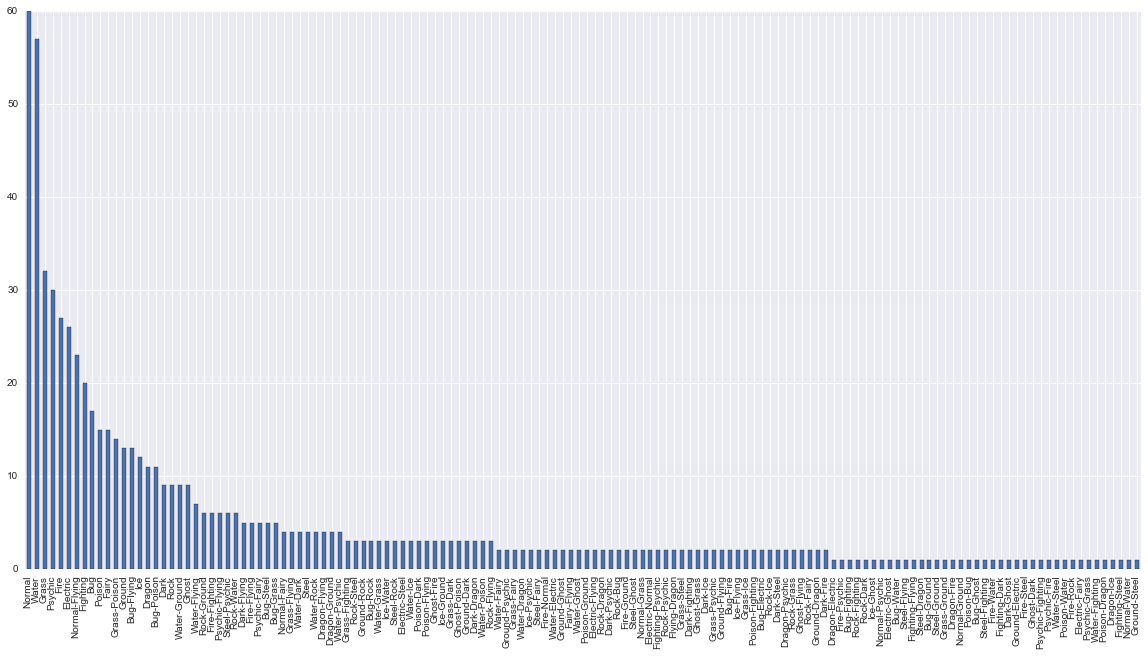

In [22]:
df.Pokemon_Type.value_counts().plot(kind='bar', figsize=(20,10))

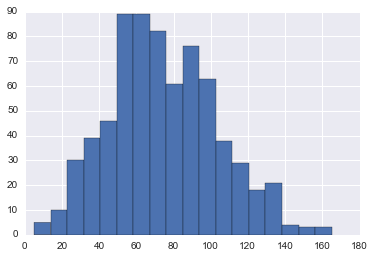

In [23]:
df.Attack.hist(bins = 18)

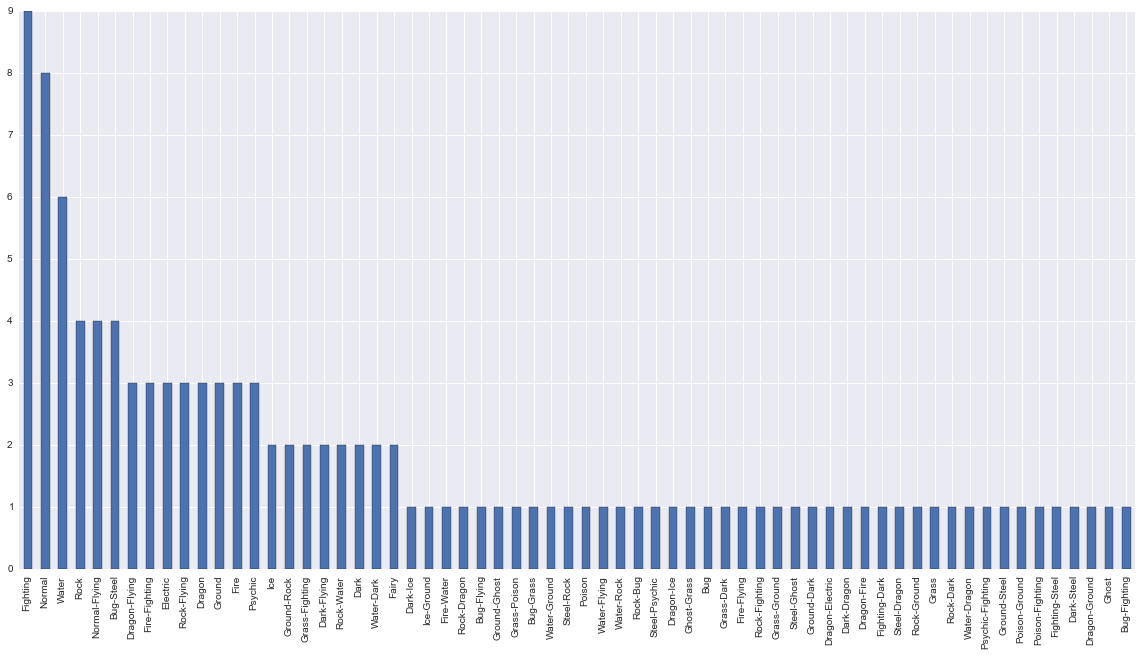

In [24]:
df[df.Attack > 100].Pokemon_Type.value_counts().plot(kind='bar', figsize=(20,10))

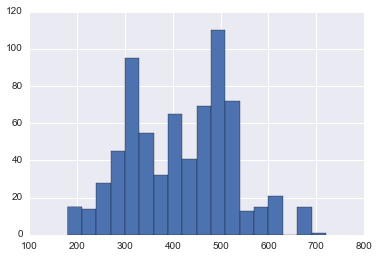

In [25]:
df.Total.hist(bins = 18)

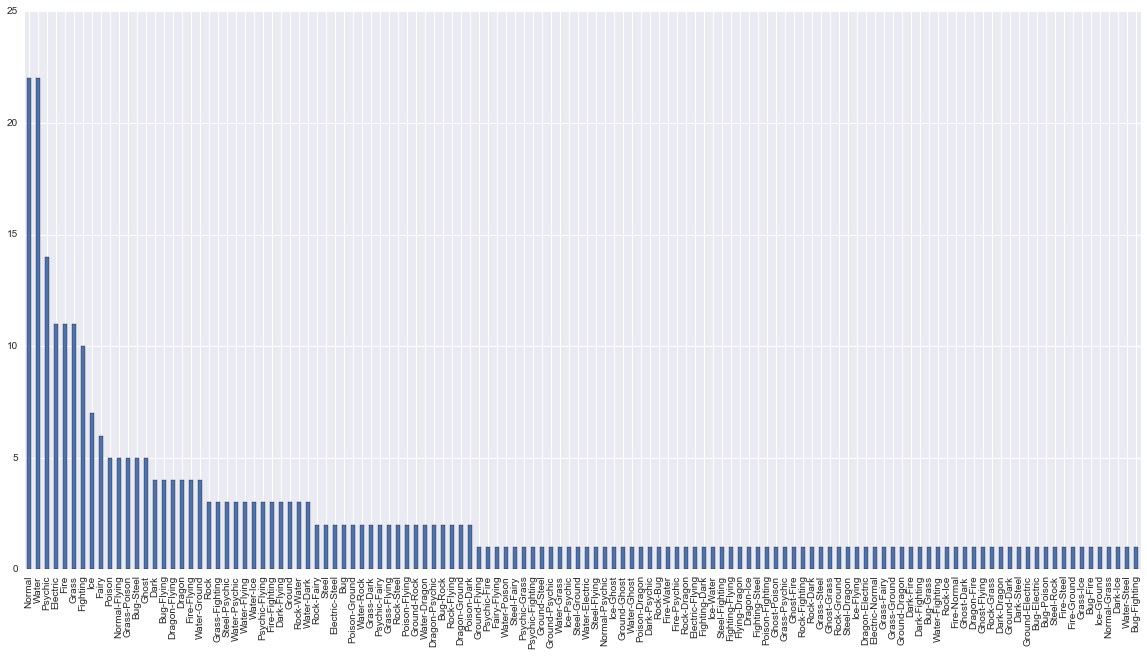

In [26]:
df[df.Total > 450].Pokemon_Type.value_counts().plot(kind='bar', figsize=(20,10))

In [27]:
df[df.Total > 450].Pokemon_Type.value_counts()

Normal             22
Water              22
Psychic            14
Electric           11
Fire               11
Grass              11
Fighting           10
Ice                 7
Fairy               6
Poison              5
Normal-Flying       5
Grass-Poison        5
Bug-Steel           5
Ghost               5
Dark                4
Bug-Flying          4
Dragon-Flying       4
Dragon              4
Fire-Flying         4
Water-Ground        4
Rock                3
Grass-Fighting      3
Steel-Psychic       3
Water-Psychic       3
Water-Flying        3
Water-Ice           3
Psychic-Flying      3
Fire-Fighting       3
Dark-Flying         3
Ground              3
                   ..
Electric-Normal     1
Grass-Fairy         1
Grass-Ground        1
Ground-Dragon       1
Dark-Fire           1
Dark-Fighting       1
Bug-Grass           1
Water-Fighting      1
Rock-Ice            1
Fire-Normal         1
Ghost-Dark          1
Dragon-Fire         1
Ghost-Flying        1
Rock-Grass          1
Dark-Drago

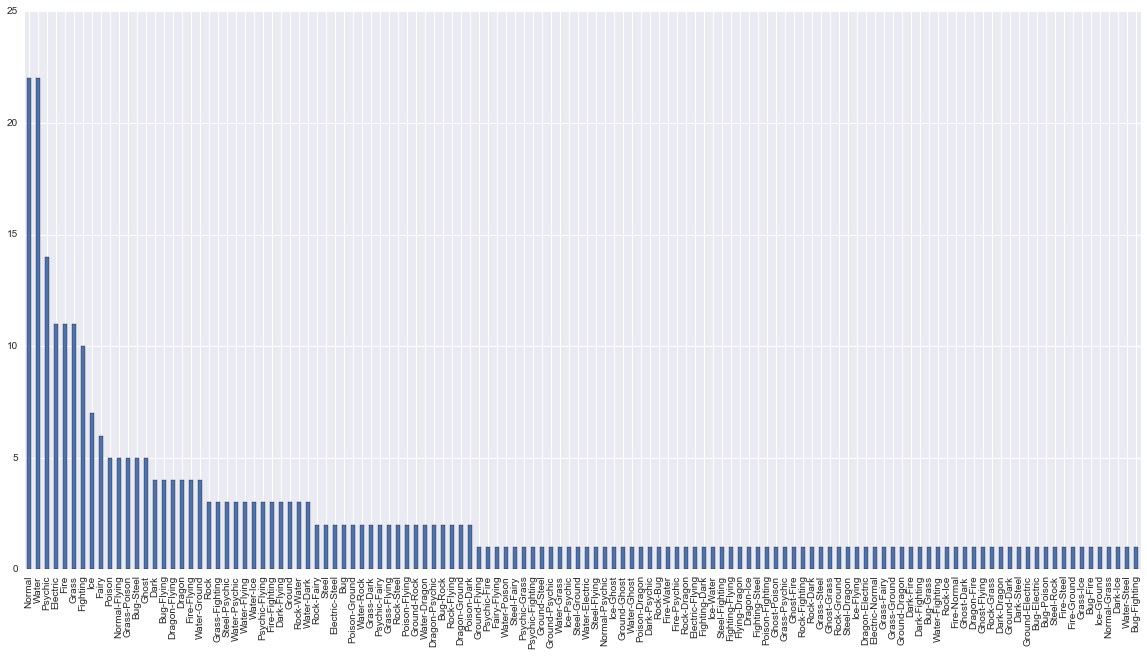

In [28]:
df[df.Total > 450].Pokemon_Type.value_counts().plot(kind='bar', figsize=(20,10))

In [29]:
over_450 = df[df.Total > 450].Pokemon_Type, df[df.Total > 450].Pokemon_Type.value_counts()
over_450

(2         Grass-Poison
 5          Fire-Flying
 8                Water
 17       Normal-Flying
 25            Electric
 30       Poison-Ground
 33       Poison-Ground
 35               Fairy
 37                Fire
 41       Poison-Flying
 44        Grass-Poison
 54               Water
 56            Fighting
 58                Fire
 61      Water-Fighting
 64             Psychic
 67            Fighting
 70        Grass-Poison
 72        Water-Poison
 75         Rock-Ground
 77                Fire
 79       Water-Psychic
 81      Electric-Steel
 84       Normal-Flying
 86           Water-Ice
 88              Poison
 90           Water-Ice
 93        Ghost-Poison
 96             Psychic
 98               Water
             ...       
 647         Water-Dark
 652        Fire-Flying
 657        Fire-Normal
 660              Fairy
 662              Grass
 664      Fighting-Dark
 665             Normal
 670              Fairy
 672              Fairy
 674       Dark-Psychic
 676         Roc

In [30]:
any_total = df.Pokemon_Type.value_counts()
print any_total.shape

(140,)


#Let's Import the Type Chart

In [31]:
url = 'http://pokemondb.net/type/dual'

In [32]:
page = urllib2.urlopen(url).read()
soup = BeautifulSoup(page)

In [33]:
#Check to see what soup looks like
soup.prettify()[:1000]

u'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Pok\xe9mon dual-type charts | Pok\xe9mon Database\n  </title>\n  <link href="http://fonts.googleapis.com/css?family=Lato:400,700,400italic|Open+Sans+Condensed:700" rel="stylesheet"/>\n  <link href="/static/css/min/pokemondb.24.css" rel="stylesheet"/>\n  <link href="/static/css/min/pkmn-icons.3.css" rel="stylesheet"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="A set of charts for each Pok\xe9mon type, detailing their strengths against every type combination." name="description"/>\n  <link href="http://pokemondb.net/type/dual" rel="canonical"/>\n  <link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="/apple-touch-icon-precomposed.png" rel="apple-touch-icon-precomposed"/>\n  <link href="http://pokemondb.net/news/feed" rel="alternate" title="The Pokemon Database newsfeed" type="application/rss+xml"/>\n  <!--[if lt IE 9]>\n\t<scr

In [34]:
table_body = soup.find('tbody')
print "Type: ", type(table_body)
print "\n"
print table_body.prettify()[:1000]

Type:  <class 'bs4.element.Tag'>


<tbody>
 <tr>
  <th class="cell-nano">
   ATTACK →
   <br/>
   DEFENSE ↴
  </th>
  <th class="cell-nano">
   PKMN
  </th>
  <th>
   <a class="type-abbr type-normal" href="/type/normal" title="Normal">
    Nor
   </a>
  </th>
  <th>
   <a class="type-abbr type-fire" href="/type/fire" title="Fire">
    Fir
   </a>
  </th>
  <th>
   <a class="type-abbr type-water" href="/type/water" title="Water">
    Wat
   </a>
  </th>
  <th>
   <a class="type-abbr type-electric" href="/type/electric" title="Electric">
    Ele
   </a>
  </th>
  <th>
   <a class="type-abbr type-grass" href="/type/grass" title="Grass">
    Gra
   </a>
  </th>
  <th>
   <a class="type-abbr type-ice" href="/type/ice" title="Ice">
    Ice
   </a>
  </th>
  <th>
   <a class="type-abbr type-fighting" href="/type/fighting" title="Fighting">
    Fig
   </a>
  </th>
  <th>
   <a class="type-abbr type-poison" href="/type/poison" title="Poison">
    Poi
   </a>
  </th>
  <th>
   <a class="type-abb

In [35]:
#Get the Header row
header_row = table_body.findAll('tr')[0]
print header_row

<tr>
<th class="cell-nano">ATTACK →<br/>
					DEFENSE ↴</th>
<th class="cell-nano">PKMN</th>
<th><a class="type-abbr type-normal" href="/type/normal" title="Normal">Nor</a></th>
<th><a class="type-abbr type-fire" href="/type/fire" title="Fire">Fir</a></th>
<th><a class="type-abbr type-water" href="/type/water" title="Water">Wat</a></th>
<th><a class="type-abbr type-electric" href="/type/electric" title="Electric">Ele</a></th>
<th><a class="type-abbr type-grass" href="/type/grass" title="Grass">Gra</a></th>
<th><a class="type-abbr type-ice" href="/type/ice" title="Ice">Ice</a></th>
<th><a class="type-abbr type-fighting" href="/type/fighting" title="Fighting">Fig</a></th>
<th><a class="type-abbr type-poison" href="/type/poison" title="Poison">Poi</a></th>
<th><a class="type-abbr type-ground" href="/type/ground" title="Ground">Gro</a></th>
<th><a class="type-abbr type-flying" href="/type/flying" title="Flying">Fly</a></th>
<th><a class="type-abbr type-psychic" href="/type/psychic" title="

In [36]:
table_heads = header_row.findAll('th')
print table_heads

[<th class="cell-nano">ATTACK →<br/>
					DEFENSE ↴</th>, <th class="cell-nano">PKMN</th>, <th><a class="type-abbr type-normal" href="/type/normal" title="Normal">Nor</a></th>, <th><a class="type-abbr type-fire" href="/type/fire" title="Fire">Fir</a></th>, <th><a class="type-abbr type-water" href="/type/water" title="Water">Wat</a></th>, <th><a class="type-abbr type-electric" href="/type/electric" title="Electric">Ele</a></th>, <th><a class="type-abbr type-grass" href="/type/grass" title="Grass">Gra</a></th>, <th><a class="type-abbr type-ice" href="/type/ice" title="Ice">Ice</a></th>, <th><a class="type-abbr type-fighting" href="/type/fighting" title="Fighting">Fig</a></th>, <th><a class="type-abbr type-poison" href="/type/poison" title="Poison">Poi</a></th>, <th><a class="type-abbr type-ground" href="/type/ground" title="Ground">Gro</a></th>, <th><a class="type-abbr type-flying" href="/type/flying" title="Flying">Fly</a></th>, <th><a class="type-abbr type-psychic" href="/type/psychic"

In [37]:
table_heads[0].contents

[u'ATTACK \u2192', <br/>, u'\n\t\t\t\t\tDEFENSE \u21b4']

In [38]:
table_heads[1].contents

[u'PKMN']

In [39]:
table_heads[2].contents

[<a class="type-abbr type-normal" href="/type/normal" title="Normal">Nor</a>]

In [40]:
one_head = table_heads[2].contents

In [41]:
type_head = one_head[0]

In [42]:
type_head.contents

[u'Nor']

In [43]:
one_head = table_heads[3].contents
type_head = one_head[0]
print type_head
print type(type_head)
print type_head.contents
print one_head
print type(one_head)
print type_head.attrs
print type_head['title']

<a class="type-abbr type-fire" href="/type/fire" title="Fire">Fir</a>
<class 'bs4.element.Tag'>
[u'Fir']
[<a class="type-abbr type-fire" href="/type/fire" title="Fire">Fir</a>]
<type 'list'>
{'href': '/type/fire', 'class': ['type-abbr', 'type-fire'], 'title': 'Fire'}
Fire


In [44]:
len(table_heads)

20

In [45]:
#Find all the columns

cols = []
for x in xrange(0,len(table_heads)):
    col = ''
    if x == 0:
        col = 'Attack | Defense >'
    elif x == 1:
        col = table_heads[x].contents[0]
    else:
        one_head = table_heads[x].contents
        type_head = one_head[0]
        col = type_head['title']
    cols.append(col)
    
print cols

['Attack | Defense >', u'PKMN', 'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy']


##We've got the columns of the table

In [46]:
effect_rows = table_body.findAll('tr')[0:]
print len(effect_rows)
print '\n', "example row: ", '\n', effect_rows[0]

342

example row:  
<tr>
<th class="cell-nano">ATTACK →<br/>
					DEFENSE ↴</th>
<th class="cell-nano">PKMN</th>
<th><a class="type-abbr type-normal" href="/type/normal" title="Normal">Nor</a></th>
<th><a class="type-abbr type-fire" href="/type/fire" title="Fire">Fir</a></th>
<th><a class="type-abbr type-water" href="/type/water" title="Water">Wat</a></th>
<th><a class="type-abbr type-electric" href="/type/electric" title="Electric">Ele</a></th>
<th><a class="type-abbr type-grass" href="/type/grass" title="Grass">Gra</a></th>
<th><a class="type-abbr type-ice" href="/type/ice" title="Ice">Ice</a></th>
<th><a class="type-abbr type-fighting" href="/type/fighting" title="Fighting">Fig</a></th>
<th><a class="type-abbr type-poison" href="/type/poison" title="Poison">Poi</a></th>
<th><a class="type-abbr type-ground" href="/type/ground" title="Ground">Gro</a></th>
<th><a class="type-abbr type-flying" href="/type/flying" title="Flying">Fly</a></th>
<th><a class="type-abbr type-psychic" href="/t

In [48]:
example_row = effect_rows[1]
#print example_row.prettify(:300)

In [49]:
def run_through_row (one_row):
    #print "Running: run_through_row"
    data = []
    th_row = one_row.find('th')
    #print th_row
    #print th_row.contents
    name_1 = th_row.contents[0].contents[0]
    name_2 = th_row.contents[2].contents[0]
    name_combo = ''
    if name_2 == '-':
    #    print "Only one type!"
        name_2 = ''
        name_combo = name_1
    else:
        name_combo = name_1 + '-' + name_2
    data.append(name_combo)
    
    all_tds = one_row.findAll('td')
    for td in all_tds:
        td_info = td.contents
        if len(td_info) == 0:
            td_info = 0
        else:
            #print td_info
            td_info = td_info[0]
            #print td_info
            #print type(td_info)
            if len(td_info) == 1:
                uni = unicodedata.numeric(td_info)
                if uni == 0.5:
                    td_info = 0.5
            #        print "changed! ", td_info
                elif uni == 0.25:
                    td_info = 0.25
            if type(td_info) == str:
                print td_info
            td_info = float(td_info)
        data.append(td_info)
    #print all_tds
    #print data
    #print len(data)
    return data
    
    
run_through_row(example_row)
for example in effect_rows[1:3]:
    run_through_row(example)


In [50]:
all_data = []
counter = 0
for row in effect_rows:
    #print row.attrs
    if row.attrs == {}:
    #    print "Well it's a header"
    #    counter += 1
        continue
    #print "-----"
    #print counter
    one_row_data = run_through_row(row)
    all_data.append(one_row_data)

#print all_data

In [51]:
np_array = np.array(all_data)
df_EFCT = pd.DataFrame(np_array, columns=cols)
df_EFCT.head(400)

,Attack | Defense >,PKMN,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Normal,61.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0.0,0,0,0,0
1,Normal-Fire,2.0,0,0.5,2.0,0,0.5,0.5,2.0,0,2.0,0,0,0.5,2.0,0.0,0,0,0.5,0.5
2,Normal-Water,1.0,0,0.5,0.5,2.0,2.0,0.5,2.0,0,0,0,0,0,0,0.0,0,0,0.5,0
3,Normal-Electric,2.0,0,0,0,0.5,0,0,2.0,0,2.0,0.5,0,0,0,0.0,0,0,0.5,0
4,Normal-Grass,2.0,0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.0,0,2.0,0,0.0,0,0,0,0
5,Normal-Ice,0.0,0,2.0,0,0,0,0.5,4.0,0,0,0,0,0,2.0,0.0,0,0,2.0,0
6,Normal-Fighting,2.0,0,0,0,0,0,0,2.0,0,0,2.0,2.0,0.5,0.5,0.0,0,0.5,0,2.0
7,Normal-Poison,0.0,0,0,0,0,0.5,0,0,0.5,2.0,0,2.0,0.5,0,0.0,0,0,0,0.5
8,Normal-Ground,1.0,0,0,2.0,0.0,2.0,2.0,2.0,0.5,0,0,0,0,0.5,0.0,0,0,0,0
9,Normal-Flying,24.0,0,0,0,2.0,0.5,2.0,0,0,0.0,0,0,0.5,2.0,0.0,0,0,0,0


#Next steps 2.8.16
##Combine the two tables
##Figure out how you could pick just one pokemon and see which 3 would be the best against it

###Merging documentation
http://pandas.pydata.org/pandas-docs/stable/merging.html

####pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects:
merge(left, right, how='inner', on=None, left_on=None, right_on=None,
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)
      
####You should do an outer join!

In [53]:
# see the column names
print "df col names: ", '\n', df.columns
print 'df_EFCT col names: ', '\n', df_EFCT.columns


df col names:  
Index([          u'ID',            Name,            Type,           Total,
                    HP,          Attack,         Defense,         Sp. Atk,
               Sp. Def,           Speed, u'Pokemon_Type'],
      dtype='object')
df_EFCT col names:  
Index([u'Attack | Defense >',                  PKMN,             u'Normal',
                     u'Fire',              u'Water',           u'Electric',
                    u'Grass',                u'Ice',           u'Fighting',
                   u'Poison',             u'Ground',             u'Flying',
                  u'Psychic',                u'Bug',               u'Rock',
                    u'Ghost',             u'Dragon',               u'Dark',
                    u'Steel',              u'Fairy'],
      dtype='object')


In [71]:
df_EFCT = df_EFCT.rename(columns={'Type': 'Pokemon_Type'})
df_EFCT.columns

Index([u'Pokemon_Type',            PKMN,       u'Normal',         u'Fire',
              u'Water',     u'Electric',        u'Grass',          u'Ice',
           u'Fighting',       u'Poison',       u'Ground',       u'Flying',
            u'Psychic',          u'Bug',         u'Rock',        u'Ghost',
             u'Dragon',         u'Dark',        u'Steel',        u'Fairy'],
      dtype='object')

In [77]:
df_EFCT['Pokemon_Type'].count
df.head()
df.shape

(706, 11)

In [79]:
dfc = pd.merge(df, df_EFCT, on='Pokemon_Type', how='inner')
print "Shape: ", dfc.shape
dfc.head(100)

Shape:  (706, 30)


,ID,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,001,Bulbasaur,None,318,45,49,49,65,65,45,...,0,2.0,2.0,0,0,0,0,0,0,0.5
1,002,Ivysaur,None,405,60,62,63,80,80,60,...,0,2.0,2.0,0,0,0,0,0,0,0.5
2,003,Venusaur,None,525,80,82,83,100,100,80,...,0,2.0,2.0,0,0,0,0,0,0,0.5
3,043,Oddish,None,320,45,50,55,75,65,30,...,0,2.0,2.0,0,0,0,0,0,0,0.5
4,044,Gloom,None,395,60,65,70,85,75,40,...,0,2.0,2.0,0,0,0,0,0,0,0.5
5,045,Vileplume,None,490,75,80,85,110,90,50,...,0,2.0,2.0,0,0,0,0,0,0,0.5
6,069,Bellsprout,None,300,50,75,35,70,30,40,...,0,2.0,2.0,0,0,0,0,0,0,0.5
7,070,Weepinbell,None,390,65,90,50,85,45,55,...,0,2.0,2.0,0,0,0,0,0,0,0.5
8,071,Victreebel,None,490,80,105,65,100,70,70,...,0,2.0,2.0,0,0,0,0,0,0,0.5
9,315,Roselia,None,400,50,60,45,100,80,65,...,0,2.0,2.0,0,0,0,0,0,0,0.5
